**Import Tensorflow as Neural Network package**

In [59]:
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # take it out before handing in !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [60]:
Data = pd.read_csv(r"C:\Users\maxd2\OneDrive - Universitaet St.Gallen\Dokumente\GitHub\Its-Wekk\5 - Models\Neural_Network\Data\50MostImp+CombinedFeatureslagged.csv")
Target = pd.read_csv(r"C:\Users\maxd2\OneDrive - Universitaet St.Gallen\Dokumente\GitHub\Its-Wekk\5 - Models\Neural_Network\Data\targetforlagged.csv")

In [61]:
Target.head()

Data.drop(columns = ['Datum'], inplace = True)
Data.head()


,Basel Temperature [2 m elevation corrected],Basel Precipitation Total,Basel Wind Speed [10 m],Basel Wind Direction [10 m],Stromverbrauch,350n_sumLief,350v_sumLW,352v_sumPW,352v_sumLief,354n_sumLW,...,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour,PM10_1h_lag,PM10_2h_lag,PM10_24h_lag
0,-1.262303,-0.318964,-0.293088,-0.150777,-1.475932,-1.028689,-0.731312,-1.185744,-0.958563,-0.779775,...,-0.046808,-0.885115,-0.020069,-0.130449,-0.629763,-0.573113,0.040175,14.492675,16.366589,75.197962
1,-1.245043,-0.318964,-0.273750,-0.072796,-1.600513,-1.028689,-0.887390,-1.357760,-1.057067,-0.779775,...,-0.066308,-0.899194,-0.024385,0.180482,-0.797138,-0.524208,0.076509,15.083582,14.492675,51.472071
2,-1.326412,-0.318964,-0.273750,-0.072796,-1.637958,-1.028689,-0.887390,-1.412081,-0.909311,-0.779775,...,-0.085808,-0.899194,-0.028700,-0.007376,-0.836521,-0.462041,0.126981,14.547155,15.083582,32.710483
3,-1.332576,-0.318964,-0.091965,-0.182397,-1.632957,-0.999069,-0.965429,-1.457349,-1.057067,-0.779775,...,-0.064003,-0.876278,-0.056258,0.258004,-0.803148,-0.190749,0.237890,13.151571,14.547155,24.801767
4,-1.323946,-0.318964,0.085512,-0.243905,-1.509269,-1.058310,-0.809351,-1.303439,-0.860059,-0.779775,...,-0.015965,-0.853920,-0.085714,0.156083,-0.419025,0.571741,0.464562,12.394376,13.151571,9.683660


In [62]:
# Beispiel: Annahme, X.shape[0] = 1000 (1000 Zeitpunkte)
n = Data.shape[0]
X = Data.copy()
y = Target["PM10_Combined_Trend_Residual"].copy()

# Split-Größen definieren
train_size = int(n * 0.7)  # 70% Training
val_size = int(n * 0.2)    # 20% Validierung
test_size = n - train_size - val_size  # 10% Test

# Training (älteste Daten)
X_train, y_train = X[:train_size], y[:train_size]

# Validierung (neuere Daten)
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]

# Test (neueste Daten)
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]


In [63]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [65]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=20,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=64, callbacks=[early_stopping])


Epoch 1/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.2810 - mae: 3.7307 - mse: 33.2925 - val_loss: 13.4623 - val_mae: 2.0894 - val_mse: 12.6698
Epoch 2/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8560 - mae: 1.9405 - mse: 7.1054 - val_loss: 14.8027 - val_mae: 2.6352 - val_mse: 14.1584
Epoch 3/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2890 - mae: 1.8607 - mse: 6.6714 - val_loss: 15.2421 - val_mae: 2.6626 - val_mse: 14.6982
Epoch 4/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7051 - mae: 1.7867 - mse: 6.1825 - val_loss: 13.6656 - val_mae: 2.5453 - val_mse: 13.1995
Epoch 5/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3809 - mae: 1.7463 - mse: 5.9317 - val_loss: 16.6766 - val_mae: 3.0730 - val_mse: 16.2731
Epoch 6/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1337 - mae: 1.7127 - mse: 5.7434 - val_loss: 14.6475 - val_mae: 2.7567 - val_mse: 14.2942
Epoch 7/800
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5588 - mae: 1.654

In [67]:
print(X_test.shape)  # Zeigt die Anzahl der Zeilen (Samples) in X_test
print(y_test.shape)  # Zeigt die Anzahl der Zeilen (Samples) in y_test


(2356, 69)
(2356,)


In [68]:
results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5918 - mae: 1.6540 - mse: 4.7993
Test loss, Test MAE: [5.557377815246582, 1.6062201261520386, 4.764869213104248]


In [ ]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.005)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=80,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=32, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)


Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.8795 - mae: 3.4850 - mse: 27.4115 - val_loss: 11.8200 - val_mae: 1.7603 - val_mse: 11.4296
Epoch 2/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.5345 - mae: 2.2284 - mse: 9.1579 - val_loss: 10.5302 - val_mae: 1.7975 - val_mse: 10.1904
Epoch 3/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.4865 - mae: 2.2145 - mse: 9.1560 - val_loss: 9.1066 - val_mae: 1.7725 - val_mse: 8.8016
Epoch 4/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.7474 - mae: 2.1647 - mse: 8.4498 - val_loss: 8.9328 - val_mae: 1.7490 - val_mse: 8.6555
Epoch 5/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.7030 - mae: 2.1611 - mse: 8.4320 - val_loss: 9.7840 - val_mae: 2.0226 - val_mse: 9.5317
Epoch 6/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5922 - mae: 2.1479 - mse: 8.3426 - val_loss: 8.3129 - val_mae: 1.7719 - val_mse: 8.0763
Epoch 7/800
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.1676 - mae: 2.0932 - mse: 7.9349 - va

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


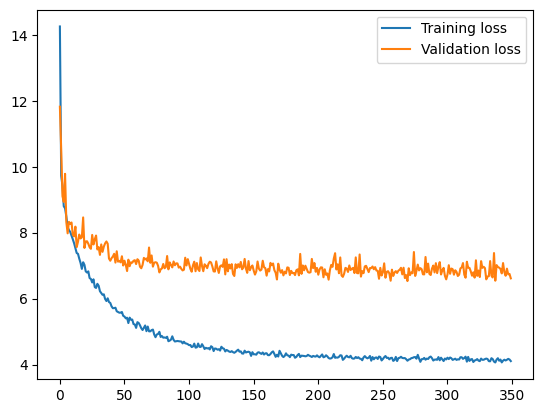

In [74]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [75]:
model3 = Sequential([
    Dense(512, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

optimizer = Adam(learning_rate=0.002)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, min_lr=1e-6)



history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)

Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.0137 - mae: 2.3888 - mse: 12.1168 - val_loss: 13.0937 - val_mae: 2.2060 - val_mse: 12.3722
Epoch 2/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0114 - mae: 1.8026 - mse: 6.4136 - val_loss: 13.7480 - val_mae: 2.4780 - val_mse: 13.3801
Epoch 3/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2447 - mae: 1.7442 - mse: 5.9200 - val_loss: 18.6739 - val_mae: 3.2697 - val_mse: 18.4173
Epoch 4/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.7072 - mae: 1.6722 - mse: 5.4659 - val_loss: 21.8087 - val_mae: 3.6788 - val_mse: 21.5774
Epoch 5/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0372 - mae: 1.6945 - mse: 5.8121 - val_loss: 23.3086 - val_mae: 3.8023 - val_mse: 23.0889
Epoch 6/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.7168 - mae: 1.6243 - mse: 5.5011 - val_loss: 22.6173 - val_mae: 3.7749 - val_mse: 22.4146
Epoch 7/800
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4942 - mae: 1.6

825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.2917 - mae: 2.8006 - mse: 19.2867 - val_loss: 14.9597 - val_mae: 3.0737 - val_mse: 14.1035 - learning_rate: 0.0010
Epoch 2/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5636 - mae: 2.0404 - mse: 7.8410 - val_loss: 8.2422 - val_mae: 2.1522 - val_mse: 7.8084 - learning_rate: 0.0010
Epoch 3/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0740 - mae: 2.0293 - mse: 8.6728 - val_loss: 10.2058 - val_mae: 2.4821 - val_mse: 9.9091 - learning_rate: 0.0010
Epoch 4/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0456 - mae: 1.8458 - mse: 6.7611 - val_loss: 11.5418 - val_mae: 2.6741 - val_mse: 11.2898 - learning_rate: 0.0010
Epoch 5/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2041 - mae: 1.7523 - mse: 5.9584 - val_loss: 14.2653 - val_mae: 3.0815 - val_mse: 14.0384 - learning_rate: 0.0010
Epoch 6/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5206 - mae: 1.6532 - mse: 5.2965 - val_loss: 15.4869 - val_mae: 3.1436 - val_mse: 15.2706 - learning_rate: 0.0010
Epoch 7/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2349 - mae: 1.7570 - mse: 6.0151 - val_loss: 13.7594 - val_mae: 2.9506 - val_mse: 13.5450 - learning_rate: 0.0010
Epoch 8/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7316 - mae: 1.6844 - mse: 5.5207 - val_loss: 19.9287 - val_mae: 3.6997 - val_mse: 19.7239 - learning_rate: 0.0010
Epoch 9/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5522 - mae: 1.6580 - mse: 5.3458 - val_loss: 26.9765 - val_mae: 4.3214 - val_mse: 26.7674 - learning_rate: 0.0010
Epoch 10/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5004 - mae: 1.6547 - mse: 5.2929 - val_loss: 16.9995 - val_mae: 3.3162 - val_mse: 16.7938 - learning_rate: 0.0010
Epoch 11/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6889 - mae: 1.6493 - mse: 5.4781 - val_loss: 17.6912 - val_mae: 3.4159 - val_mse: 17.4742 - learning_rate: 0.0010
Epoch 12/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4277 - mae: 1.6239 - mse: 5.2176 - val_loss: 18.3354 - val_mae: 3.4977 - val_mse: 18.1326 - learning_rate: 0.0010
Epoch 13/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9380 - mae: 1.5132 - mse: 4.7404 - val_loss: 19.3301 - val_mae: 3.6291 - val_mse: 19.1460 - learning_rate: 2.5000e-04
...
Epoch 17/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5297 - mae: 1.4443 - mse: 4.3617 - val_loss: 18.6069 - val_mae: 3.5405 - val_mse: 18.4405 - learning_rate: 2.5000e-04
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594]

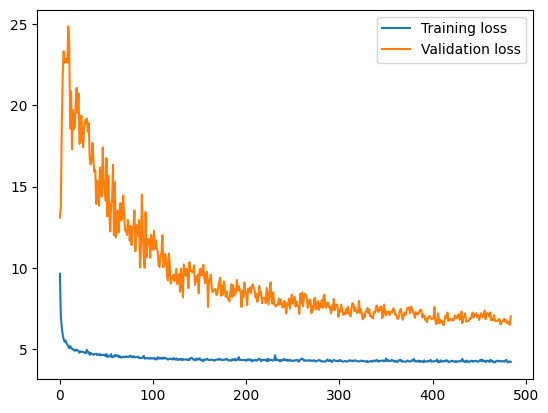

In [76]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


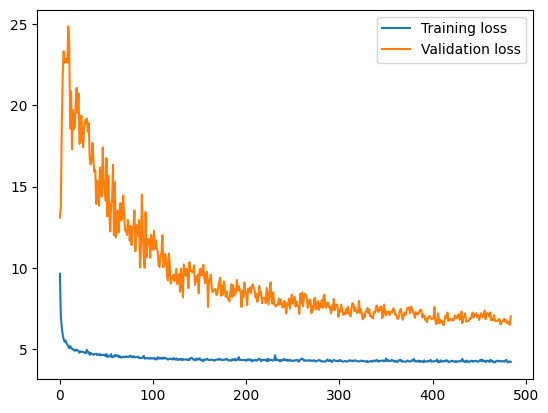

In [77]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()